In [ ]:
#importing required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:
import matplotlib.pyplot as plt


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten labels for sparse_categorical_crossentropy
y_train = y_train.flatten()
y_test = y_test.flatten()

# CIFAR-10 class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\Dell\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test),
                    batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 195s 237ms/step - accuracy: 0.3227 - loss: 1.8257 - val_accuracy: 0.5089 - val_loss: 1.3418
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 177s 205ms/step - accuracy: 0.5405 - loss: 1.2913 - val_accuracy: 0.5869 - val_loss: 1.1532
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 166s 212ms/step - accuracy: 0.6014 - loss: 1.1167 - val_accuracy: 0.6023 - val_loss: 1.1024
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 130ms/step - accuracy: 0.6396 - loss: 1.0245 - val_accuracy: 0.6471 - val_loss: 0.9966
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.6690 - loss: 0.9432 - val_accuracy: 0.6621 - val_loss: 0.9793
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.6955 - loss: 0.8676 - val_accuracy: 0.6710 - val_loss: 0.9380
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.7148 - loss: 0.8155 - val_accuracy: 0.6941 - val_loss: 0.8901
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.7328 - los

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7113 - loss: 0.8453
Test Accuracy: 0.7063


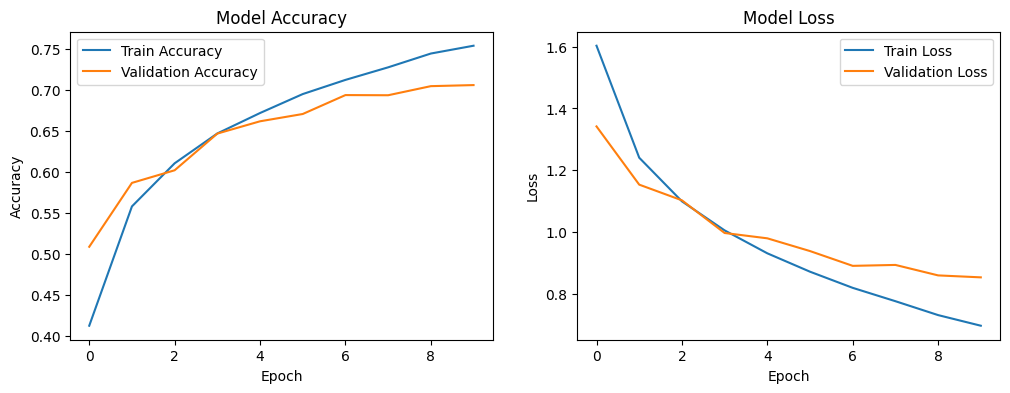

In [10]:

# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


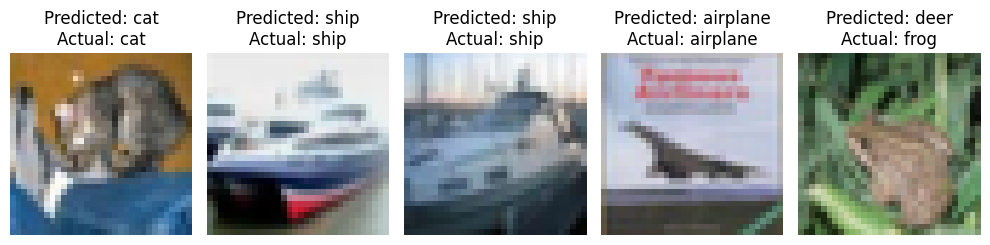

In [11]:
# Predict classes
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Show a few predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}\nActual: {class_names[y_test[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [13]:
# Recommended format (new standard)
model.save("cnn_image_classifier.keras")